In [11]:
#example:
a=1
b=10
h1=1.8
x0=1.
y0=2.
z0=1.
xe=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ye=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
xr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
yr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ze=[0.,0.,0.]
zr=[0.,0.]

def det3(A):
    b=0
    b=A[0][0]*A[1][1]*A[2][2]+A[0][1]*A[1][2]*A[2][0]+A[0][2]*A[1][0]*A[2][1]-A[0][2]*A[1][1]*A[2][0]-A[0][0]*A[1][2]*A[2][1]-A[0][1]*A[1][0]*A[2][2]
    return b

def f(x,y,z):
    return -z/(2*x)

def Eyler(x_0,y_0,z_0,xe,ye,h,a,b):
    x=0
    y=0
    z=0
    x0=x_0
    y0=y_0
    z0=z_0
    i=0
    print("Eyler's method:")
    print("i      xi       yi        zi")
    print("%.f %.8f %.8f %.8f" % (i, x0, y0,z0))
    for i in range(1,int((b-a)/h)+1):
        x=x0+h
        y=y0+h*z0
        z=z0+h*f(x0,y0,z0)
        xe[i]=x
        ye[i]=y
        print("%.f %.8f %.8f %.8f" % (i, x, y, z)) 
        x0=x
        y0=y
        z0=z
        i+=1
    
    return xe,ye

def RK(x_0,y_0,z_0,xr,yr,h,a,b):
    Ky=[0.,0.,0.,0.]
    Kz=[0.,0.,0.,0.]
    x0=x_0
    y0=y_0
    z0=z_0
    i=1
    print("Runge-Kutta:")    
    print("i       x         y         z        Ky[0]       Kz[0]     Ky[1]      Kz[1]      Ky[2]       Kz[2]     Ky[3]     Kz[3]")
    for i in range(int((b-a)/h)):
        x=x0+h
        Ky[0]=z0
        Kz[0]=f(x0,y0,z0)
        Ky[1]=z0+h/2*Kz[0]
        Kz[1]=f(x0+h/2,y0+h/2*Ky[0],z0+h/2*Kz[0])
        Ky[2]=z0+h/2*Kz[1]
        Kz[2]=f(x0+h/2,y0+h/2*Ky[1],z0+h/2*Kz[1])
        Ky[3]=z0+h*Kz[2]
        Kz[3]=f(x0+h,y0+h*Ky[2],z0+h*Kz[2])
        y=y0+h/6*(Ky[0]+2*Ky[1]+2*Ky[2]+Ky[3])
        z=z0+h/6*(Kz[0]+2*Kz[1]+2*Kz[2]+Kz[3])
        xr[i]=x
        yr[i]=y
        print("%.f %.8f %.8f %.8f %.8f %.8f %.7f %.7f %.7f %.7f %.7f %.7f" % (i,x0,y0,z0,Ky[0],Kz[0],Ky[1],Kz[1],Ky[2],Kz[2],Ky[3],Kz[3]))
        x0=x
        y0=y
        z0=z
        i+=1
    print("%.f %.8f %.8f %.8f" % (5, x, y,z))

def RR(z,h):
    zp=0
    if len(z)==3:
        A=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        B=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    A[i][j]=z[i]
                if j==1:
                    A[i][j]=h[i]
                if j==2:
                    A[i][j]=h[i]*h[i]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    B[i][j]=1
                else:
                    B[i][j]=A[i][j]
        zp=det3(A)/det3(B)
    if len(z)==2:
        zp=z[0]+(z[0]-z[1])/((h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])-1)
    print("Runge-Rombert")
    return zp

xe[0]=x0
ye[0]=y0
xr[0]=x0
yr[0]=y0
Eyler(x0,y0,z0,xe,ye,h1,a,b)
ze[0]=ye[4]
RK(x0,y0,z0,xr,yr,h1,a,b)
zr[0]=yr[3]

Eyler's method:
i      xi       yi        zi
0 1.00000000 2.00000000 1.00000000
1 2.80000000 3.80000000 0.10000000
2 4.60000000 3.98000000 0.06785714
3 6.40000000 4.10214286 0.05458075
4 8.20000000 4.20038820 0.04690533
5 10.00000000 4.28481779 0.04175718
Runge-Kutta:
i       x         y         z        Ky[0]       Kz[0]     Ky[1]      Kz[1]      Ky[2]       Kz[2]     Ky[3]     Kz[3]
0 1.00000000 2.00000000 1.00000000 1.00000000 -0.50000000 0.5500000 -0.1447368 0.8697368 -0.2288781 0.5880194 -0.1050035
1 2.80000000 3.32824792 0.59432999 0.59432999 -0.10613035 0.4988127 -0.0674071 0.5336636 -0.0721167 0.4645199 -0.0504913
2 4.60000000 4.26538864 0.46362920 0.46362920 -0.05039448 0.4182742 -0.0380249 0.4294068 -0.0390370 0.3933626 -0.0307315
3 6.40000000 5.03109476 0.39305428 0.39305428 -0.03070737 0.3654176 -0.0250286 0.3705285 -0.0253787 0.3473727 -0.0211813
4 8.20000000 5.69479056 0.34724333 0.34724333 -0.02117337 0.3281873 -0.0180323 0.3310143 -0.0181876 0.3145057 -0.0157253
5 10.00

In [18]:
a=3
b=5
h=[0.5,0.25,0.2]
x0=3.0
y0=3.0
z0=8.0
xe=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ye=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
xr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
yr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ze=[0.,0.,0.]
zr=[0.,0.]
z=[0.,0.]

def det3(A):
    b=0
    b=A[0][0]*A[1][1]*A[2][2]+A[0][1]*A[1][2]*A[2][0]+A[0][2]*A[1][0]*A[2][1]-A[0][2]*A[1][1]*A[2][0]-A[0][0]*A[1][2]*A[2][1]-A[0][1]*A[1][0]*A[2][2]
    return b

def f(x,y,z):
    return -z+3*y+3*x-3
def Eyler(x_0,y_0,z_0,xe,ye,h,a,b,ze):
    x=0
    y=0
    z=0
    x0=x_0
    y0=y_0
    z0=z_0
    i=0
    print("Eyler's method:")
    print("i      xi       yi        zi")
    print("%.f %.8f %.8f %.8f" % (i, x0, y0,z0))
    for i in range(1,int((b-a)/h)+1):
        x=x0+h
        y=y0+h*z0
        z=z0+h*f(x0,y0,z0)
        xe[i]=x
        ye[i]=y
        print("%.f %.8f %.8f %.8f" % (i, x, y, z)) 
        x0=x
        y0=y
        z0=z
        i+=1
    for j in range(0,3):
        if ze[j]==0:
            if j==0:
                ze[j]=ye[4]
            if j==1:
                ze[j]=ye[8]
            if j==2:
                ze[j]=ye[10]
    return xe,ye


def RK(x_0,y_0,z_0,xr,yr,h,a,b,zr):
    Ky=[0.,0.,0.,0.]
    Kz=[0.,0.,0.,0.]
    x0=x_0
    y0=y_0
    z0=z_0
    i=1
    print("Runge-Kutta:")    
    print("i       x         y         z        Ky[0]       Kz[0]     Ky[1]      Kz[1]    Ky[2]     Kz[2]    Ky[3]    Kz[3]")
    for i in range(int((b-a)/h)):
        x=x0+h
        Ky[0]=z0
        Kz[0]=f(x0,y0,z0)
        Ky[1]=z0+h/2*Kz[0]
        Kz[1]=f(x0+h/2,y0+h/2*Ky[0],z0+h/2*Kz[0])
        Ky[2]=z0+h/2*Kz[1]
        Kz[2]=f(x0+h/2,y0+h/2*Ky[1],z0+h/2*Kz[1])
        Ky[3]=z0+h*Kz[2]
        Kz[3]=f(x0+h,y0+h*Ky[2],z0+h*Kz[2])
        y=y0+h/6*(Ky[0]+2*Ky[1]+2*Ky[2]+Ky[3])
        z=z0+h/6*(Kz[0]+2*Kz[1]+2*Kz[2]+Kz[3])
        xr[i]=x
        yr[i]=y
        print("%.f %.8f %.8f %.8f %.8f %.8f %.7f %.7f %.5f %.5f %.5f %.5f" % (i,x0,y0,z0,Ky[0],Kz[0],Ky[1],Kz[1],Ky[2],Kz[2],Ky[3],Kz[3]))
        x0=x
        y0=y
        z0=z
        i+=1
    print("%.f %.8f %.8f %.8f" % (5, x, y,z))
    for j in range(0,2):
        if zr[j]==0:
            if j==0:
                zr[j]=yr[3]
            if j==1:
                zr[j]=yr[7]
                
def RR(z,h):
    zp=0
    if len(z)==3:
        print("Runge:")
        A=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        B=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    A[i][j]=z[i]
                if j==1:
                    A[i][j]=h[i]
                if j==2:
                    A[i][j]=h[i]*h[i]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    B[i][j]=1
                else:
                    B[i][j]=A[i][j]
        zp=det3(A)/det3(B)
    if len(z)==2:
        zp=z[0]+(z[0]-z[1])/((h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])-1)
        print("Runge-Rombert")
    return zp

for i in range(0,3):
    xe[0]=x0
    ye[0]=y0
    xr[0]=x0
    yr[0]=y0
    Eyler(x0,y0,z0,xe,ye,h[i],a,b,ze)
    if i!=2:
        RK(x0,y0,z0,xr,yr,h[i],a,b,zr)
print RR(ze,h)
print RR(zr,h)

Eyler's method:
i      xi       yi        zi
0 3.00000000 3.00000000 8.00000000
1 3.50000000 7.00000000 11.50000000
2 4.00000000 12.75000000 20.00000000
3 4.50000000 22.75000000 33.62500000
4 5.00000000 39.56250000 56.18750000
Runge-Kutta:
i       x         y         z        Ky[0]       Kz[0]     Ky[1]      Kz[1]    Ky[2]     Kz[2]    Ky[3]    Kz[3]
0 3.00000000 3.00000000 8.00000000 8.00000000 7.00000000 9.7500000 12.0000000 11.00000 12.06250 14.03125 18.96875
1 3.50000000 8.29427083 14.17447917 14.17447917 18.20833333 18.7265625 25.0371094 20.43376 26.74398 27.54647 36.98698
2 4.00000000 18.29773627 27.40426975 27.40426975 36.48893907 36.5265045 48.6699066 39.57175 52.46634 53.63744 71.11339
3 4.50000000 37.73425392 53.22717160 53.22717160 70.47559016 70.8460691 93.5270713 76.60894 100.97837 103.71636 136.39981
5 5.00000000 75.38871620 102.88436271
Eyler's method:
i      xi       yi        zi
0 3.00000000 3.00000000 8.00000000
1 3.25000000 5.00000000 9.75000000
2 3.50000000 7.437500

In [16]:
#-x-((35*sqrt(13)-104)*(exp(-x*(1+sqrt(13))+3*sqrt(13)+3))^(1/2))/39+((8*sqrt(13)+35)*(exp(-x-3*sqrt(13)+x*sqrt(13)+3))^(1/2))/(3*sqrt(13))+3/2
#2/3-x-1/39*exp(3/2+3*sqrt(13)/2)*(-104+35*sqrt(13))*exp(x*(-1/2 - sqrt(13)/2)) + 1/39*exp(3/2-3*sqrt(13)/2)*(104+35*sqrt(13))*exp(x*(-1/2 +sqrt(13)/2))

[3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]


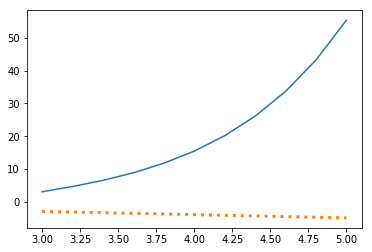

In [27]:
import numpy as np
import matplotlib.pyplot as plt
r=np.linspace(3,5,int((b-a)/h[2])+1)
print r
fig=plt.figure()
plt.plot(xe,ye)
plt.plot(r, 2/3-r-1/39*np.exp(3/2+3*np.sqrt(13)/2)*(-104+35*np.sqrt(13))*np.exp(r*(-1/2 - np.sqrt(13)/2)) + 1/39*np.exp(3/2-3*np.sqrt(13)/2)*(104+35*np.sqrt(13))*np.exp(r*(-1/2 +np.sqrt(13)/2)), linestyle=':',linewidth=3)
